In [1]:
%%capture

#Imaporta a rede VGG19 ja treinada
from keras.applications.vgg19 import VGG19
model = VGG19()

#Pre-processamento da imagem
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

#Biblioteca para operar sobre o modelo
from keras import models

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import pickle

#Biblioteca do SOM
from minisom import MiniSom

In [2]:
j=0
for i in model.layers[:]:
    print(j, ' ', i.name, ' - ', i.output_shape)
    j+=1

0   input_1  -  (None, 224, 224, 3)
1   block1_conv1  -  (None, 224, 224, 64)
2   block1_conv2  -  (None, 224, 224, 64)
3   block1_pool  -  (None, 112, 112, 64)
4   block2_conv1  -  (None, 112, 112, 128)
5   block2_conv2  -  (None, 112, 112, 128)
6   block2_pool  -  (None, 56, 56, 128)
7   block3_conv1  -  (None, 56, 56, 256)
8   block3_conv2  -  (None, 56, 56, 256)
9   block3_conv3  -  (None, 56, 56, 256)
10   block3_conv4  -  (None, 56, 56, 256)
11   block3_pool  -  (None, 28, 28, 256)
12   block4_conv1  -  (None, 28, 28, 512)
13   block4_conv2  -  (None, 28, 28, 512)
14   block4_conv3  -  (None, 28, 28, 512)
15   block4_conv4  -  (None, 28, 28, 512)
16   block4_pool  -  (None, 14, 14, 512)
17   block5_conv1  -  (None, 14, 14, 512)
18   block5_conv2  -  (None, 14, 14, 512)
19   block5_conv3  -  (None, 14, 14, 512)
20   block5_conv4  -  (None, 14, 14, 512)
21   block5_pool  -  (None, 7, 7, 512)
22   flatten  -  (None, 25088)
23   fc1  -  (None, 4096)
24   fc2  -  (None, 4096)
25   pre

In [3]:
#Vetor com os nomes das imagens na pasta
imgs_ = []
os.chdir("/home/gustavo/PROG/images/val2017/")
for file_name in glob.glob("*.jpg"):
    imgs_.append(file_name)
print("Numero de imagens: ", len(imgs_))
imgs, val = imgs_[:int(0.8*len(imgs_))], imgs_[int(0.8*len(imgs_))+1:]

Numero de imagens:  45670


In [4]:
#Cria o modelo que gera os outputs da camada da CNN desejada
cnn_layer = 23
activation_model = models.Model(inputs=model.input, outputs=model.layers[cnn_layer].output)

In [5]:
som_filename = "/home/gustavo/JUPYTER_LAB/networks/VGG19_layer23_dim32x32_train10k_tpi1_sig2_lr0.03.p"
'''
#Cria o SOM
som = MiniSom(32, 32, model.layers[cnn_layer].output_shape[-1], 2, 0.03)

num_train = 10000
train_per_image = 1
verbose = 500
print("INICIO")
for i in range(num_train):   
    n=np.random.randint(0, len(imgs))
    img = load_img('/home/gustavo/PROG/images/val2017/'+imgs[n], target_size=(224, 224))
    img_aux = img_to_array(img)
    img_aux = img_aux.reshape((1, img_aux.shape[0], img_aux.shape[1], img_aux.shape[2]))
    img_aux = preprocess_input(img_aux)
    layer_output = activation_model.predict(img_aux)
    
    som.train(layer_output, train_per_image)
    
    if((i+1)%verbose == 0):
        print("Concluido: ", i+1)
print("FIM")

with open(som_filename, 'wb') as outfile:
    pickle.dump(som, outfile)
'''
with open(som_filename, 'rb') as infile:
    som = pickle.load(infile)

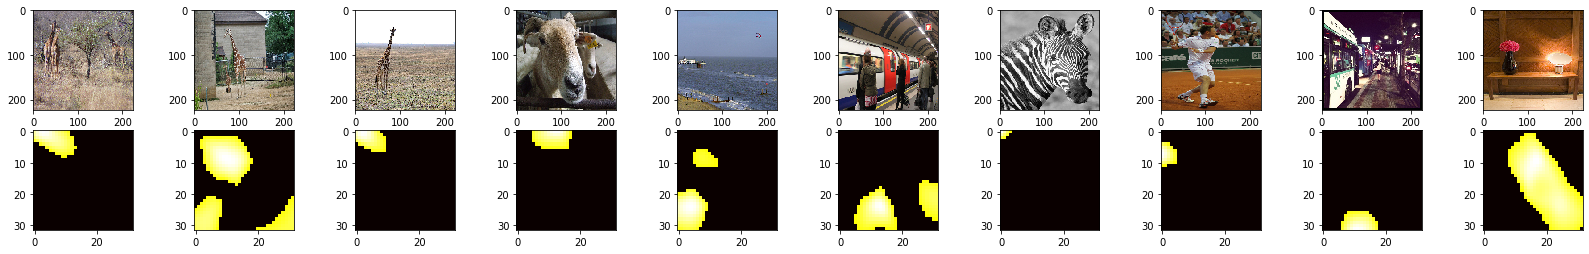

In [23]:
num_ex = 10
cont = 1
plt.figure(figsize=(11, 11))
for i in range(num_ex):
    n=np.random.randint(0, len(val))
    img = load_img('/home/gustavo/PROG/images/val2017/'+val[n], target_size=(224, 224))
    img_aux = img_to_array(img)
    img_aux = img_aux.reshape((1, img_aux.shape[0], img_aux.shape[1], img_aux.shape[2]))
    img_aux = preprocess_input(img_aux)
    layer_output = activation_model.predict(img_aux)
    
    feature_map = som.activate(layer_output)
    f_min, f_max = np.amin(feature_map), np.amax(feature_map)
    feature_map = (feature_map - f_min) / (f_max - f_min)
    feature_map = 1 - feature_map
    feature_map[np.where(feature_map < 0.75 )] = 0
    
    #k = 4
    #feature_map = np.amax(feature_map)/(1+np.exp(-k*(feature_map-(9*np.amax(feature_map)/10))))
    
    plt.subplot( (num_ex*2), num_ex, cont )
    plt.imshow(img)

    plt.subplot( (num_ex*2), num_ex, (cont+num_ex) )
    plt.imshow(feature_map, cmap = 'hot')
    
    cont += 1
    plt.subplots_adjust(left=1, bottom=0, right=3, top=3, wspace=0.2, hspace=0.2)
plt.show()

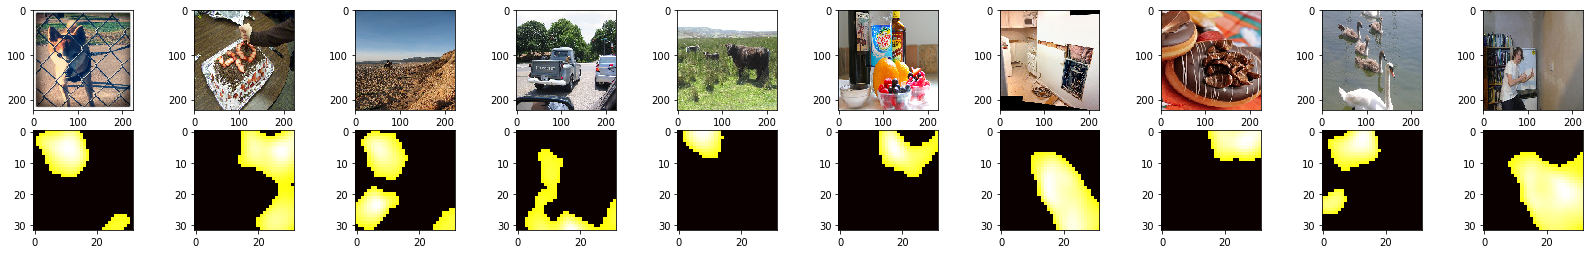

In [24]:
num_ex = 10
cont = 1
plt.figure(figsize=(11, 11))
for i in range(num_ex):
    n=np.random.randint(0, len(imgs))
    img = load_img('/home/gustavo/PROG/images/val2017/'+imgs[n], target_size=(224, 224))
    img_aux = img_to_array(img)
    img_aux = img_aux.reshape((1, img_aux.shape[0], img_aux.shape[1], img_aux.shape[2]))
    img_aux = preprocess_input(img_aux)
    layer_output = activation_model.predict(img_aux)
    
    feature_map = som.activate(layer_output)
    f_min, f_max = np.amin(feature_map), np.amax(feature_map)
    feature_map = (feature_map - f_min) / (f_max - f_min)
    feature_map = 1 - feature_map
    feature_map[np.where(feature_map < 0.75)] = 0
    
    #k = 4
    #feature_map = np.amax(feature_map)/(1+np.exp(-k*(feature_map-(9*np.amax(feature_map)/10))))
    
    plt.subplot( (num_ex*2), num_ex, cont )
    plt.imshow(img)

    plt.subplot( (num_ex*2), num_ex, (cont+num_ex) )
    plt.imshow(feature_map, cmap = 'hot')
    
    cont += 1
    plt.subplots_adjust(left=1, bottom=0, right=3, top=3, wspace=0.2, hspace=0.2)
plt.show()

In [8]:
import numpy as np
a = np.arange(20)
a[np.random.choice(15, 2)]

array([12, 13])

In [9]:
a = np.arange(100).reshape(2, 50).transpose()
b = np.arange(100).reshape(2, 50).transpose()

In [10]:
c = np.concatenate((a, b), axis=1)

In [11]:
np.shape(c)

(50, 4)